## Importing Libraries

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt     
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn import datasets
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from hyperopt import tpe, STATUS_OK, Trials, hp, fmin, STATUS_OK, space_eval
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import pickle
import pandas as pd
import json
from pandas import json_normalize
from scipy.stats import zscore
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.svm import SVC

## Part A

#### Part 1.1 a -Read ‘Car name.csv’ as a DataFrame and assign it to a variable

In [2]:
df1 = pd.read_csv('C:\\Users\\Sai\\Desktop\GL\\Project4_UnsupervisedLearning\\Part1_Car_name.csv', index_col=False)

In [3]:
df1.shape

(398, 1)

In [4]:
df1=df1.reset_index() 
df1=df1.drop(['index'],axis=1)
df1.head()

,car_name
0,chevrolet chevelle malibu
1,buick skylark 320
2,plymouth satellite
3,amc rebel sst
4,ford torino


#### Part 1.1 b -Read ‘Car-Attributes.json as a DataFrame and assign it to a variable

In [5]:
df2 = pd.read_json('C:\\Users\\Sai\\Desktop\GL\\Project4_UnsupervisedLearning\\Part1_CarAttributes.json')
df2=df2.reset_index() 
df2=df2.drop(['index'],axis=1)
df2.head()


,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [6]:
df2.shape

(398, 8)

#### Part 1.1 c -Merge both the DataFrames together to form a single DataFrame

In [7]:
ndf = pd.concat([df1,df2], axis = 1)

In [8]:
ndf.shape

(398, 9)

In [9]:
ndf.head()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1


#### Part 1.1 d -Print 5 point summary of the numerical features and share insights

In [10]:
ndf.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


### Insights
<li> We can easily identify the outliers from the above 25 percentile and 75 percentile data.
<li> From Mean we can identify the middle value of each attribute
<li> Minimum, 25%, 75% and maximum values of the features can provide the additional information about the variance. 

#### Part 1.2 a -Check and print feature-wise percentage of missing values present in the data and impute with the best suitable approach

In [11]:
percentage_missing = ndf.isnull().sum() * 100 / len(ndf)
percentage_missing

car_name    0.0
mpg         0.0
cyl         0.0
disp        0.0
hp          0.0
wt          0.0
acc         0.0
yr          0.0
origin      0.0
dtype: float64

In [12]:
ndf.fillna(ndf.mean())
ndf.isnull().sum()

C:\Users\Sai1\AppData\Local\Temp\ipykernel_10952\1468103249.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ndf.fillna(ndf.mean())


car_name    0
mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
dtype: int64

#### Part 1.2 b -Check for duplicate values in the data and impute with the best suitable approach

In [14]:
ndf.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
393    False
394    False
395    False
396    False
397    False
Length: 398, dtype: bool

In [15]:
len(ndf)-len(ndf.drop_duplicates())

0

#### Part 1.2 c -Plot a pairplot for all features

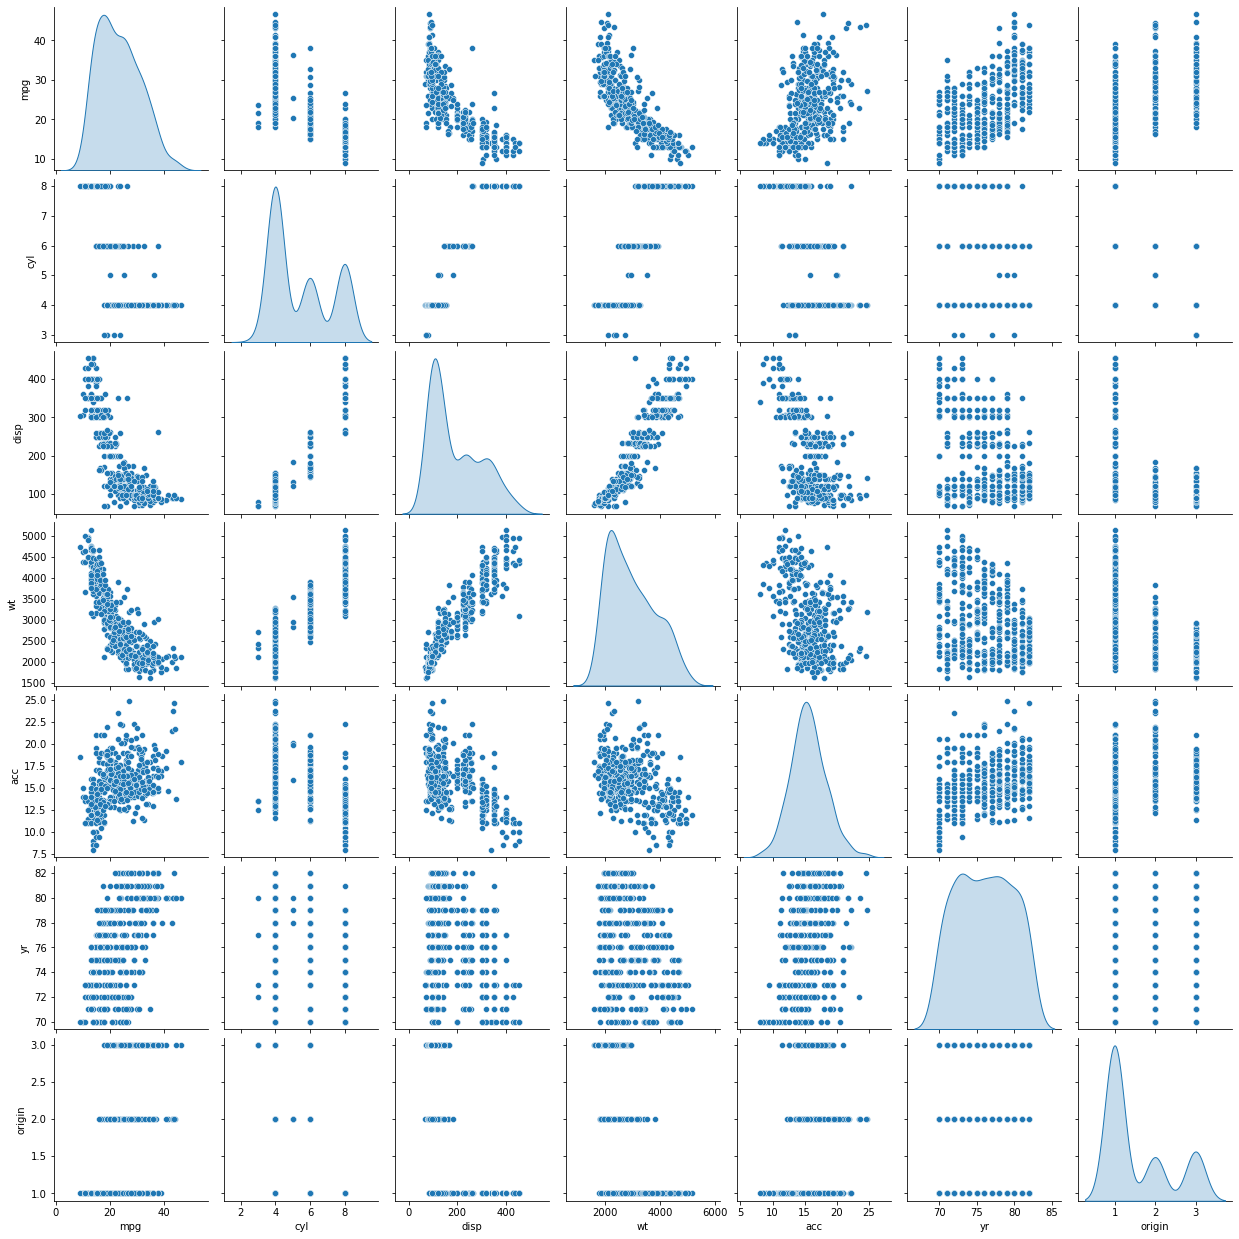

In [15]:
sns.pairplot(ndf, diag_kind='kde') 

#### Part 1.2 d -Visualize a scatterplot for ‘wt’ and ‘disp’. Datapoints should be distinguishable by ‘cyl’

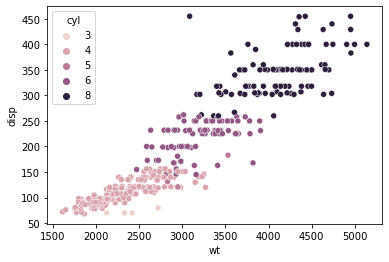

In [16]:
sns. scatterplot(x="wt", y="disp", hue="cyl", data=ndf);
plt.show()

#### Part 1.2 e -Share insights for Q2.d

<li> There is a positive linear relationship between displacement, weight and number of cylinders 
<li> Overall when the displacement increases the cylinder weight also increasing
<li> When the number of cyclinders in the car increases, the displacement and weight also increases
   

#### Part 1.2 f -Visualize a scatterplot for ‘wt’ and ’mpg’. Datapoints should be distinguishable by ‘cyl’

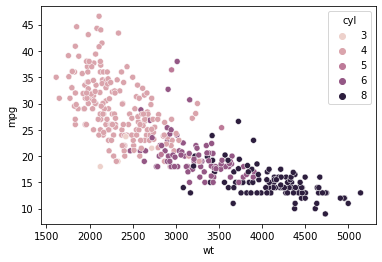

In [17]:
sns. scatterplot(x="wt", y="mpg", hue="cyl", data=ndf);
plt.show()

#### Part 1.2 g-Share insights for Q2.f

<li> There is a negative correlation between weight amd mpg
<li> Similarly when the number of cylinder increases, the milage(mpg) also drops    
<li> When the number of cylinder and weight decreases, the milage(mpg) is increases  
    

#### Part 1.2 h -Check for unexpected values in all the features and datapoints with such values

In [16]:
print(ndf.loc[[32]])

      car_name   mpg  cyl  disp hp    wt   acc  yr  origin
32  ford pinto  25.0    4  98.0  ?  2046  19.0  71       1


In [17]:
ndf = ndf.replace(r'^\s*$', np.nan, regex=True)
ndf = ndf.apply(lambda x: x.fillna(0),axis=0)
missing_values = ["?", "a", "-",""]
ndfnew = ndf.replace(missing_values, np.nan)
ndfnew = ndfnew.apply(lambda x: x.fillna(0),axis=0)
ndfnew.isnull().sum()

car_name    0
mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
dtype: int64

In [18]:
print(ndfnew.loc[[32]])

      car_name   mpg  cyl  disp   hp    wt   acc  yr  origin
32  ford pinto  25.0    4  98.0  0.0  2046  19.0  71       1


In [19]:
ndfnew.dtypes

car_name     object
mpg         float64
cyl           int64
disp        float64
hp          float64
wt            int64
acc         float64
yr            int64
origin        int64
dtype: object

#### Part 1.3 a -Apply K-Means clustering for 2 to 10 clusters

In [20]:
ndfnew.drop('car_name', axis=1, inplace = True)
ndfnew_z = ndfnew.apply(zscore)
ndfnew_z.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,-0.706439,1.498191,1.090604,0.673950,0.630870,-1.295498,-1.627426,-0.715145
1,-1.090751,1.498191,1.503514,1.544187,0.854333,-1.477038,-1.627426,-0.715145
2,-0.706439,1.498191,1.196232,1.171228,0.550470,-1.658577,-1.627426,-0.715145
3,-0.962647,1.498191,1.061796,1.171228,0.546923,-1.295498,-1.627426,-0.715145
4,-0.834543,1.498191,1.042591,0.922589,0.565841,-1.840117,-1.627426,-0.715145


In [21]:
ndfnew_z.shape

(398, 8)

In [23]:
clusters=range(2,11)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(ndfnew_z)
    prediction=model.predict(ndfnew_z)
    meanDistortions.append(sum(np.min(cdist(ndfnew_z, model.cluster_centers_, 'euclidean'), axis=1)) / ndfnew_z.shape[0])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Window

#### Part 1.3 b -Plot a visual and find elbow point

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

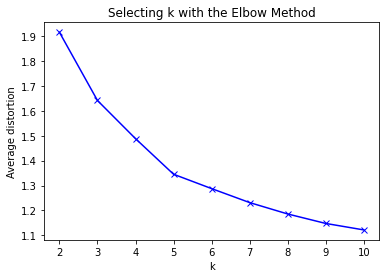

In [24]:
plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

#### Part 1.3 c -On the above visual, highlight which are the possible Elbow points

5


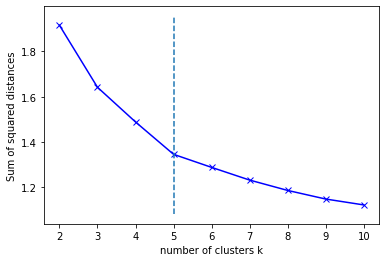

In [25]:
from kneed import KneeLocator
kn = KneeLocator(clusters, meanDistortions,  curve='convex', direction='decreasing')
print(kn.knee)

import matplotlib.pyplot as plt
plt.xlabel('number of clusters k')
plt.ylabel('Sum of squared distances')
plt.plot(clusters, meanDistortions, 'bx-')
plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')

<li> The possible elbow point is 5

#### Part 1.3 d -Train a K-means clustering model once again on the optimal number of clusters

In [26]:
k_means = KMeans(n_clusters = 5)

In [27]:
k_means.fit(ndfnew_z)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=5)

In [28]:
centroids = k_means.cluster_centers_
centroids

array([[ 0.67593702, -0.74210918, -0.58440021, -0.56739077, -0.4807633 ,
         0.35623968,  0.99150092, -0.62198308],
       [-1.16379715,  1.49819126,  1.50392292,  1.47938187,  1.40409797,
        -1.0861486 , -0.68832385, -0.71514478],
       [-0.56489172,  0.45174156,  0.38428116, -0.05385717,  0.38799297,
         0.38631896, -0.08295379, -0.66890897],
       [ 1.36083919, -0.80726824, -0.9016633 , -0.81097883, -0.96314389,
         0.42357938,  0.9224577 ,  1.48683549],
       [ 0.14148761, -0.82829067, -0.8145352 , -0.45587866, -0.7363707 ,
         0.19571855, -0.73125973,  0.66697557]])

#### Part 1.3 e -Add a new feature in the DataFrame which will have labels based upon cluster value

In [29]:
centroid_df = pd.DataFrame(centroids, columns = list(ndfnew_z))
print(centroid_df)

        mpg       cyl      disp        hp        wt       acc        yr  \
0  0.675937 -0.742109 -0.584400 -0.567391 -0.480763  0.356240  0.991501   
1 -1.163797  1.498191  1.503923  1.479382  1.404098 -1.086149 -0.688324   
2 -0.564892  0.451742  0.384281 -0.053857  0.387993  0.386319 -0.082954   
3  1.360839 -0.807268 -0.901663 -0.810979 -0.963144  0.423579  0.922458   
4  0.141488 -0.828291 -0.814535 -0.455879 -0.736371  0.195719 -0.731260   

     origin  
0 -0.621983  
1 -0.715145  
2 -0.668909  
3  1.486835  
4  0.666976  


In [30]:
df_labels = pd.DataFrame(k_means.labels_, columns = list(['labels']))
df_labels['labels'] = df_labels['labels'].astype('category')
df_labeled = ndfnew.join(df_labels)

In [31]:
df_analysis = (df_labeled.groupby(['labels'] , axis=0)).head(398)
df_analysis.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,labels
0,18.0,8,307.0,130.0,3504,12.0,70,1,1
1,15.0,8,350.0,165.0,3693,11.5,70,1,1
2,18.0,8,318.0,150.0,3436,11.0,70,1,1
3,16.0,8,304.0,150.0,3433,12.0,70,1,1
4,17.0,8,302.0,140.0,3449,10.5,70,1,1


In [32]:
df_labeled['labels'].value_counts()  

1    94
4    84
2    81
3    72
0    67
Name: labels, dtype: int64

#### Part 1.3 f -Plot a visual and color the datapoints based upon clusters

C:\Users\Sai1\AppData\Local\Temp\ipykernel_11860\2508444254.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=60)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Sai1\AppData\Local\Temp\ipykernel_11860\2508444254.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior

Text(0.5, 0.92, '3D plot of KMeans Clustering')

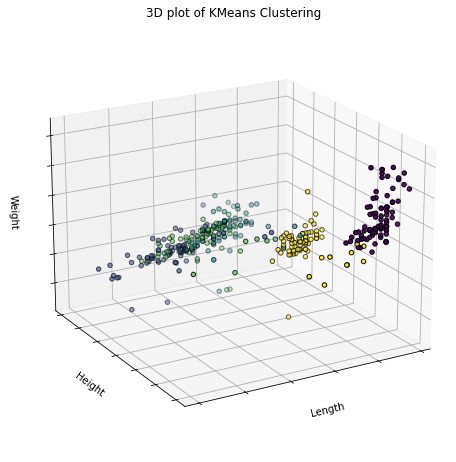

In [33]:
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=60)
k_means.fit(ndfnew_z)
labels = k_means.labels_
ax.scatter(ndfnew_z.iloc[:, 0], ndfnew_z.iloc[:, 1], ndfnew_z.iloc[:, 3],c=labels.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Length')
ax.set_ylabel('Height')
ax.set_zlabel('Weight')
ax.set_title('3D plot of KMeans Clustering')

#### Part 1.3 g -Pass a new DataPoint and predict which cluster it belongs to

In [34]:
final_model=KMeans(5)
final_model.fit(ndfnew)
prediction = final_model.predict(ndfnew)
ndfnew["GROUP"] = prediction
print("Groups Assigned : \n")
ndfnew.head()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Groups Assigned : 



,mpg,cyl,disp,hp,wt,acc,yr,origin,GROUP
0,18.0,8,307.0,130.0,3504,12.0,70,1,3
1,15.0,8,350.0,165.0,3693,11.5,70,1,1
2,18.0,8,318.0,150.0,3436,11.0,70,1,3
3,16.0,8,304.0,150.0,3433,12.0,70,1,3
4,17.0,8,302.0,140.0,3449,10.5,70,1,3


In [35]:
df_test = pd.read_csv('C:\\Users\\Sai\\Desktop\GL\\Project4_UnsupervisedLearning\\Test.csv', index_col=False)
df_test.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,33.7,4,107,75,2210,14.4,81,3
1,20.0,8,220,110,3200,20.0,85,3


In [36]:
predictions_test = final_model.predict(df_test)
df_test["GROUP"] = predictions_test
print("Groups Assigned : \n")
df_test.head()

Groups Assigned : 



,mpg,cyl,disp,hp,wt,acc,yr,origin,GROUP
0,33.7,4,107,75,2210,14.4,81,3,2
1,20.0,8,220,110,3200,20.0,85,3,3


#### Part 2. 1 a -Read ‘vehicle.csv’ and save as DataFrame

In [37]:
df_v = pd.read_csv('C:\\Users\\Sai\\Desktop\\GL\\Project4_UnsupervisedLearning\\Part2_Vehicle.csv')
df_v.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


#### Part 2.1 b-Check percentage of missing values and impute with correct approach.

In [38]:
percentage_missing = df_v.isnull().sum() * 100 / len(df_v)
percentage_missing

compactness                    0.000000
circularity                    0.591017
distance_circularity           0.472813
radius_ratio                   0.709220
pr.axis_aspect_ratio           0.236407
max.length_aspect_ratio        0.000000
scatter_ratio                  0.118203
elongatedness                  0.118203
pr.axis_rectangularity         0.354610
max.length_rectangularity      0.000000
scaled_variance                0.354610
scaled_variance.1              0.236407
scaled_radius_of_gyration      0.236407
scaled_radius_of_gyration.1    0.472813
skewness_about                 0.709220
skewness_about.1               0.118203
skewness_about.2               0.118203
hollows_ratio                  0.000000
class                          0.000000
dtype: float64

In [39]:
df_v1 = df_v.replace(r'^\s*$', np.nan, regex=True)
df_v1 = df_v1.apply(lambda x: x.fillna(0),axis=0)
missing_values = ["?", "a", "-",""]
ndf_v = df_v1.replace(missing_values, np.nan)
ndf_v = ndf_v.apply(lambda x: x.fillna(0),axis=0)
ndf_v.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

Text(0.5, 1.0, 'Vehicle')

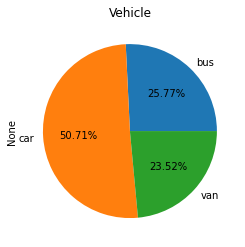

In [40]:
ndf_v.groupby('class').size().plot(kind='pie', autopct='%.2f%%')
plt.title('Vehicle')

#### Part 2.1 d -Check for duplicate rows in the data and impute with correct approach.

In [41]:
duplicate = ndf_v[ndf_v.duplicated()]
print("Duplicate Rows :")
duplicate

Duplicate Rows :


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class


In [42]:
percentage = ndf_v.duplicated(keep=False).value_counts(normalize=True) * 100
print (percentage)

False    100.0
dtype: float64


#### Part 2.2 a -Split data into X and Y.

In [43]:
x = ndf_v.drop('class',axis=1)     
y = ndf_v['class']     
print(x)
print(y)

     compactness  circularity  distance_circularity  radius_ratio  \
0             95         48.0                  83.0         178.0   
1             91         41.0                  84.0         141.0   
2            104         50.0                 106.0         209.0   
3             93         41.0                  82.0         159.0   
4             85         44.0                  70.0         205.0   
..           ...          ...                   ...           ...   
841           93         39.0                  87.0         183.0   
842           89         46.0                  84.0         163.0   
843          106         54.0                 101.0         222.0   
844           86         36.0                  78.0         146.0   
845           85         36.0                  66.0         123.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                    72.0                       10          162.0   
1                    57.0        

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [45]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(ndf_v.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(ndf_v.index)) * 100))

79.91% data is in training set
20.09% data is in test set


#### Part 2.2 b -Standardize the Data.

In [46]:
xtrain_z= stats.zscore(x_train)
xtrain_z

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
135,-0.581861,0.335226,0.061173,4.174060,8.379534,8.151668,-0.329818,0.280573,-0.179895,1.033734,1.203995,-0.429365,0.020336,2.609212,-1.275495,0.161592,-0.484559,-0.216177
223,-1.550674,-0.080323,-0.593338,-0.788551,-0.194954,-0.541322,-0.476597,0.405601,-0.519586,-0.150562,-0.260285,-0.523931,0.080235,0.929677,-1.069908,0.272044,-0.695346,-1.280920
388,0.023647,0.335226,0.180175,4.472359,8.966827,8.358643,-0.417885,0.280573,-0.519586,0.476418,3.923371,-0.484992,0.349782,6.598110,1.191557,-0.390665,-0.062986,0.050008
134,0.992460,1.304839,1.072691,-0.137717,-1.017165,0.286582,1.284748,-1.219761,1.178867,1.730378,0.905162,1.267260,0.769077,0.404822,1.191557,1.597460,-0.168380,-0.083085
619,0.386952,1.443355,0.834687,0.052110,-0.899706,0.286582,1.372815,-1.219761,1.178867,1.730378,0.905162,1.356264,1.278220,0.299851,-1.275495,-0.942921,-0.484559,-0.349270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,0.750257,1.027806,1.608200,1.543605,0.744716,0.286582,1.548950,-1.344789,1.518558,1.173063,1.562594,1.612148,0.948774,0.089909,0.163619,1.707912,-0.062986,0.449287
767,-0.702963,-0.772904,-0.712340,-0.056362,0.509799,-0.334346,-0.623375,0.405601,-0.519586,-0.986535,-0.648767,-0.607372,-0.968002,-0.329975,-0.247557,0.051141,0.463979,0.715472
72,-0.218556,-0.772904,0.537181,0.621590,0.039964,-0.127370,0.198586,-0.469594,0.159795,-0.777542,0.217847,0.138031,-0.728405,-0.539917,-0.658732,1.155655,0.358586,0.582379
235,-0.460760,0.473742,-0.236332,-0.924141,-0.664789,0.493558,-0.271106,0.280573,-0.179895,1.312392,-0.589001,-0.418240,0.289882,0.404822,-1.069908,0.161592,-0.695346,-0.482363


In [47]:
xtest_z = stats.zscore(x_test)
xtest_z

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
693,-0.392245,0.241682,-0.351910,-0.984061,-0.748302,0.746112,-0.205616,0.209298,-0.171350,0.904910,-0.370220,-0.347792,0.022706,0.805530,-1.314555,0.380154,-1.125753,-0.515369
375,1.953960,1.208411,0.876523,0.678452,-0.375976,-1.244635,1.887296,-1.622059,1.823818,0.705986,2.378274,2.068004,1.367848,1.603550,-1.314555,0.735243,-0.331653,-1.359151
185,0.842600,-0.563925,-0.351910,1.153456,1.237436,-0.960242,0.294184,-0.706380,0.227684,-0.620176,0.587121,0.305126,-0.562139,0.007511,0.043362,0.735243,1.256546,0.187783
464,0.842600,0.725047,-0.044802,1.183144,1.113327,-0.675850,0.512846,-0.837192,0.227684,0.573370,0.648884,0.530679,0.812246,0.167115,-0.732590,0.025065,1.415366,0.469044
709,0.225178,-0.402804,0.937945,0.915954,0.492784,0.177327,0.356659,-0.575569,0.227684,-0.421251,0.432711,0.275448,-0.620623,-0.790509,-1.120567,1.918872,0.621266,0.609674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,-0.268760,-0.725047,0.139463,-0.004366,-0.127759,-0.107065,-0.205616,-0.052324,-0.171350,-0.951716,0.123891,-0.264694,-0.445170,0.007511,-0.344614,-0.685113,-0.490473,-0.655999
447,0.225178,2.014019,1.429318,1.836274,1.609761,0.461719,1.418734,-1.360436,1.424784,1.833223,1.204760,1.438828,1.543301,0.326719,-1.314555,-1.040201,-0.490473,-0.374739
436,-0.021791,-0.402804,-1.027548,-1.280939,-1.244736,-0.391458,-0.986554,1.255787,-0.969417,-0.222327,-0.648158,-0.982903,-0.445170,0.965134,1.789255,-0.093298,-0.649293,-1.499781
543,0.348662,-1.208411,-0.413331,0.619077,0.865110,-0.107065,-0.236854,0.078487,-0.171350,-0.885408,-0.061401,-0.294372,-1.059256,-0.471301,-0.732590,0.380154,0.144806,0.187783


#### Part 2.3 a -Train a base Classification model using SVM.

In [48]:
svc_model_rbf = SVC(kernel='rbf')
svc_model_rbf.fit(xtrain_z, y_train)
prediction_test_rbf = svc_model_rbf .predict(xtest_z)
prediction_train_rbf = svc_model_rbf .predict(xtrain_z)
print(svc_model_rbf.score(xtrain_z, y_train))
print(svc_model_rbf.score(xtest_z, y_test))

0.9704142011834319
0.9529411764705882


#### Part 2.3 b -Print Classification metrics for train data.

In [49]:
print('classification report:\n', classification_report(y_train, prediction_train_rbf))

classification report:
               precision    recall  f1-score   support

         bus       0.99      0.97      0.98       181
         car       0.97      0.98      0.98       339
         van       0.94      0.95      0.95       156

    accuracy                           0.97       676
   macro avg       0.97      0.97      0.97       676
weighted avg       0.97      0.97      0.97       676



#### Part 2.3 c -Apply PCA on the data with 10 components.

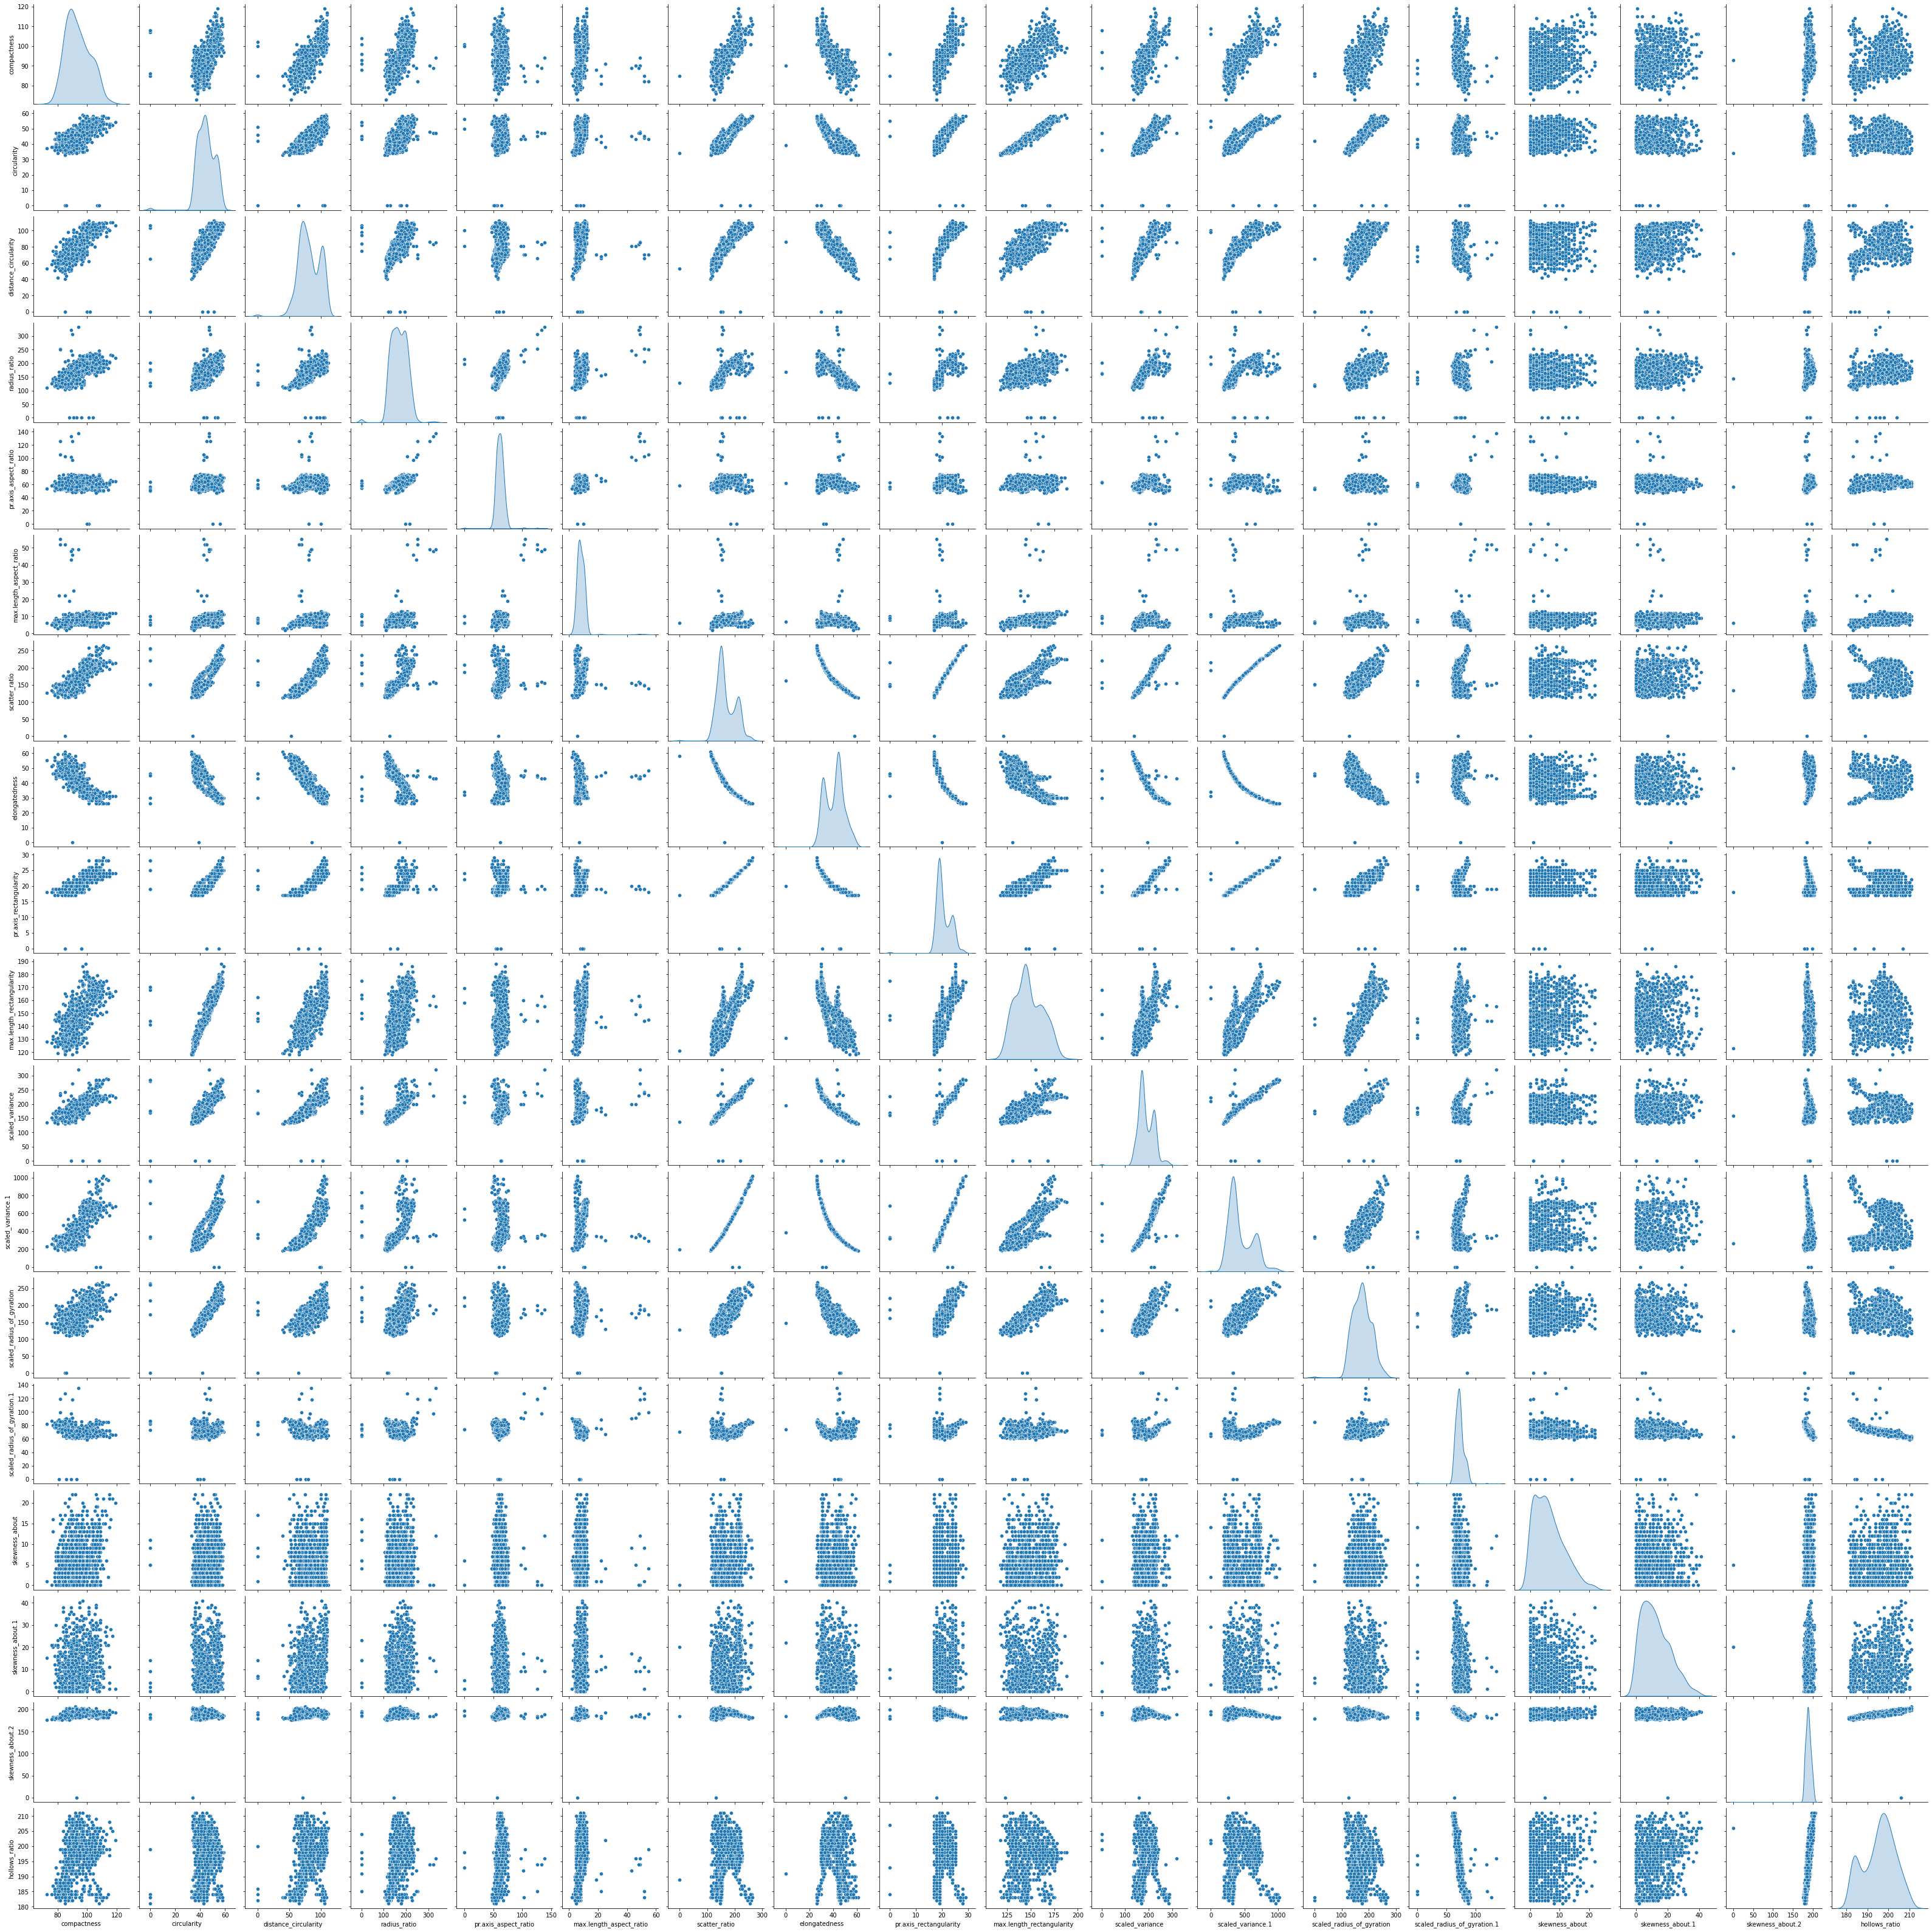

In [50]:
sns.pairplot(x, diag_kind='kde')  

In [51]:
covMatrix = np.cov(xtrain_z,rowvar=False)
print(covMatrix)

[[ 1.00148148  0.55051658  0.7436177   0.62072048  0.06644584  0.13316939
   0.8030207  -0.76459582  0.72528692  0.67885892  0.69907585  0.79458093
   0.57719226 -0.16889395  0.23583728  0.14945043  0.19519111  0.36744677]
 [ 0.55051658  1.00148148  0.6459905   0.48045659  0.14817384  0.2119747
   0.66431474 -0.64230198  0.56514769  0.78157592  0.64757063  0.63797973
   0.75686115  0.00264419  0.10369827  0.02730082  0.02190292  0.1028917 ]
 [ 0.7436177   0.6459905   1.00148148  0.65022521  0.13799258  0.23544425
   0.84828233 -0.84631098  0.74487903  0.72999941  0.75601368  0.82060611
   0.65521843 -0.16125729  0.09465153  0.26286126  0.11974691  0.34366631]
 [ 0.62072048  0.48045659  0.65022521  1.00148148  0.58566272  0.42746518
   0.64638611 -0.68660765  0.56919041  0.50966211  0.67156406  0.62144738
   0.47278932 -0.09157072  0.02663004  0.17829629  0.2415648   0.44297154]
 [ 0.06644584  0.14817384  0.13799258  0.58566272  1.00148148  0.65667202
   0.0792912  -0.14553201  0.063236

In [52]:
pca10 = PCA(n_components=10)
pca10.fit(xtrain_z)
print(pca10.components_)
print(pca10.explained_variance_ratio_)
Xpca10 = pca10.transform(xtrain_z)

[[ 0.286336    0.26010341  0.3049404   0.25647001  0.07721571  0.09723075
   0.3284715  -0.32155907  0.29586867  0.29386186  0.30799803  0.32180838
   0.28040224 -0.00976461  0.04296719  0.06516361  0.03525583  0.08068371]
 [-0.11335625  0.08788906 -0.08567125 -0.23241058 -0.19476224 -0.06582827
   0.06799949  0.00100522  0.06961414  0.12978403  0.07734413  0.08254843
   0.23374775  0.44750441 -0.04175648 -0.15767171 -0.46142555 -0.58504607]
 [-0.13386576  0.01487514 -0.06543879  0.25263439  0.61033879  0.59172222
  -0.09496146  0.06956242 -0.10374276 -0.00164346  0.07189242 -0.10554162
  -0.00396333  0.35881992 -0.107399   -0.08766546 -0.03803259 -0.02721333]
 [-0.08604837 -0.19165511  0.07170808  0.05991223 -0.03299309 -0.02609723
   0.08066102 -0.09099637  0.09728079 -0.18512086  0.11738492  0.087781
  -0.20701508  0.06826579 -0.60111602  0.64924603 -0.18176822 -0.04407148]
 [ 0.09451321 -0.14536262  0.02507602 -0.03644432 -0.0232372   0.15654431
  -0.00891809  0.07352147  0.0502094

In [53]:
print(Xpca10)

[[ 2.63545723e+00 -1.34114043e+00  1.23542280e+01 ...  1.03930300e-02
   9.29161379e-01  7.23540111e-01]
 [-1.79217217e+00  1.83214808e+00  2.56537962e-01 ... -6.02945812e-01
   2.33608474e-01  4.88766775e-02]
 [ 3.67334056e+00 -1.76783486e-02  1.42577255e+01 ... -2.28228607e-02
  -8.29498219e-01 -1.07453220e+00]
 ...
 [ 1.04509356e-01 -1.35431841e+00 -2.27960181e-01 ... -1.20681149e-01
   3.06400007e-01 -2.98306906e-01]
 [-5.05518224e-01  1.35662034e+00  8.50128104e-02 ...  8.28449979e-01
  -1.04708187e-02  7.04401531e-01]
 [ 2.82821701e+00 -2.78625321e-02  1.27754905e+01 ...  5.90246728e-01
   3.67744243e-02 -2.76389397e-01]]


In [54]:
print(pca10.explained_variance_ratio_)

[0.47438216 0.12813623 0.10629914 0.0665456  0.05031789 0.03716735
 0.03106136 0.0229282  0.01594482 0.01246018]


#### Part 2.3 d -Visualize Cumulative Variance Explained with Number of Components.

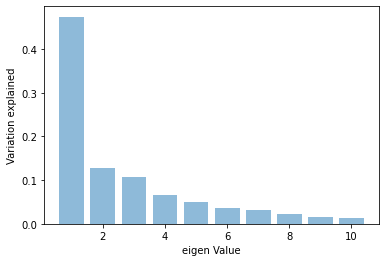

In [55]:
plt.bar(list(range(1,11)),pca10.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

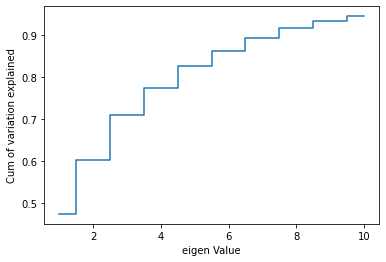

In [56]:
plt.step(list(range(1,11)),np.cumsum(pca10.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

#### Part 2.3 e -Draw a horizontal line on the above plot to highlight the threshold of 90%.

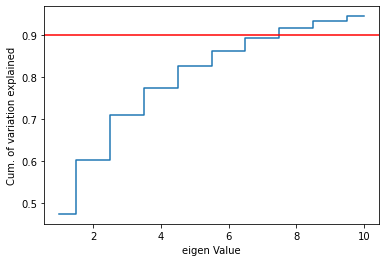

In [57]:
plt.step(list(range(1,11)),np.cumsum(pca10.explained_variance_ratio_), where='mid')
plt.ylabel('Cum. of variation explained')
plt.xlabel('eigen Value')
plt.axhline(y = 0.9, color = 'r', linestyle = '-')
plt.show()

#### Part 2.3 f -Apply PCA on the data. This time Select Minimum Components with 90% or above variance explained

In [58]:
pca7 = PCA(n_components=7)
pca7.fit(xtrain_z)
print(pca7.components_)
print(pca7.explained_variance_ratio_)
Xpca7 = pca7.transform(xtrain_z)

[[ 0.286336    0.26010341  0.3049404   0.25647001  0.07721571  0.09723075
   0.3284715  -0.32155907  0.29586867  0.29386186  0.30799803  0.32180838
   0.28040224 -0.00976461  0.04296719  0.06516361  0.03525583  0.08068371]
 [-0.11335625  0.08788906 -0.08567125 -0.23241058 -0.19476224 -0.06582827
   0.06799949  0.00100522  0.06961414  0.12978403  0.07734413  0.08254843
   0.23374775  0.44750441 -0.04175648 -0.15767171 -0.46142555 -0.58504607]
 [-0.13386576  0.01487514 -0.06543879  0.25263439  0.61033879  0.59172222
  -0.09496146  0.06956242 -0.10374276 -0.00164346  0.07189242 -0.10554162
  -0.00396333  0.35881992 -0.107399   -0.08766546 -0.03803259 -0.02721333]
 [-0.08604837 -0.19165511  0.07170808  0.05991223 -0.03299309 -0.02609723
   0.08066102 -0.09099637  0.09728079 -0.18512086  0.11738492  0.08778101
  -0.20701508  0.06826579 -0.60111602  0.64924603 -0.18176822 -0.04407148]
 [ 0.09451321 -0.14536262  0.02507602 -0.03644432 -0.0232372   0.15654431
  -0.00891808  0.07352147  0.05020

In [59]:
print(Xpca7)

[[ 2.63545723 -1.34114043 12.35422797 ...  0.46326893  0.87908924
   0.52856872]
 [-1.79217217  1.83214808  0.25653796 ... -0.52838341  0.1040086
  -0.70745076]
 [ 3.67334056 -0.01767835 14.2577255  ...  2.76405453 -1.74922329
   0.2759974 ]
 ...
 [ 0.10450936 -1.35431841 -0.22796018 ...  0.14050821 -0.336596
   0.38217189]
 [-0.50551822  1.35662034  0.08501281 ... -0.63588139  1.16684639
  -1.0933432 ]
 [ 2.82821701 -0.02786253 12.77549047 ...  0.96893395 -0.12409028
  -0.38015896]]


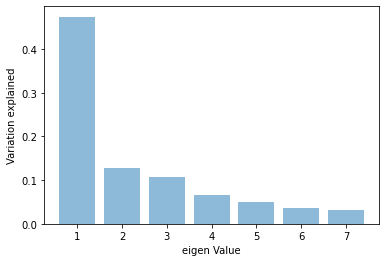

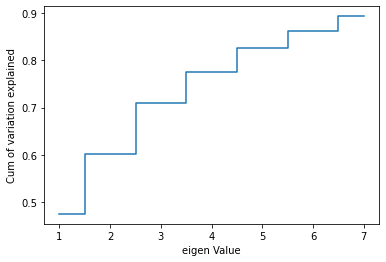

In [60]:
plt.bar(list(range(1,8)),pca7.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()
plt.step(list(range(1,8)),np.cumsum(pca7.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

#### Part 2.3 g -Train SVM model on components selected from above step.

In [61]:
svc_model_rbf_pca = SVC(kernel='rbf')
svc_model_rbf_pca.fit(Xpca7, y_train)
prediction_train_rbf_pca = svc_model_rbf_pca.predict(Xpca7)
print(svc_model_rbf_pca.score(Xpca7, y_train))

0.9230769230769231


#### Part 2.3 h -Print Classification metrics for train data of above model and share insights.

In [62]:
print('classification report:\n', classification_report(y_train, prediction_train_rbf_pca))

classification report:
               precision    recall  f1-score   support

         bus       0.97      0.91      0.94       181
         car       0.95      0.94      0.95       339
         van       0.82      0.91      0.86       156

    accuracy                           0.92       676
   macro avg       0.91      0.92      0.92       676
weighted avg       0.93      0.92      0.92       676



#### Insights
<li>Accuracy of the SVM model is 92%   
<li>Recall values are 91%, 94% and 91%
<li>The precision values are 97%, 95% and 82%

#### Part 2.4 a -Train another SVM on the components out of PCA. Tune the parameters to improve performance.

In [63]:
svc_model_lin = SVC(C=.1, kernel='linear', gamma= 1)
svc_model_lin.fit(xtrain_z, y_train)
prediction_train_lin = svc_model_lin.predict(xtrain_z)
print(svc_model_lin.score(xtrain_z, y_train))

0.9112426035502958


In [64]:
print('classification report:\n', classification_report(y_train, prediction_train_lin))

classification report:
               precision    recall  f1-score   support

         bus       0.85      0.90      0.88       181
         car       0.96      0.89      0.92       339
         van       0.89      0.97      0.93       156

    accuracy                           0.91       676
   macro avg       0.90      0.92      0.91       676
weighted avg       0.91      0.91      0.91       676



In [65]:
param_grid={'C': [0.5,1,10,100],
     'gamma': ['scale',1,0.1,0.001,0.0001],
     'kernel': ['linear']}
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
grid.fit(xtrain_z, y_train)
print('best params:',grid.best_params_)
print('best estimator:', grid.best_estimator_)
grid_predictions = grid.predict(xtrain_z)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END .C=0.5, gamma=scale, kernel=linear;, score=0.926 total time=   0.0s
[CV 2/5] END .C=0.5, gamma=scale, kernel=linear;, score=0.904 total time=   0.0s
[CV 3/5] END .C=0.5, gamma=scale, kernel=linear;, score=0.896 total time=   0.0s
[CV 4/5] END .C=0.5, gamma=scale, kernel=linear;, score=0.919 total time=   0.0s
[CV 5/5] END .C=0.5, gamma=scale, kernel=linear;, score=0.911 total time=   0.0s
[CV 1/5] END .....C=0.5, gamma=1, kernel=linear;, score=0.926 total time=   0.0s
[CV 2/5] END .....C=0.5, gamma=1, kernel=linear;, score=0.904 total time=   0.0s
[CV 3/5] END .....C=0.5, gamma=1, kernel=linear;, score=0.896 total time=   0.0s
[CV 4/5] END .....C=0.5, gamma=1, kernel=linear;, score=0.919 total time=   0.0s
[CV 5/5] END .....C=0.5, gamma=1, kernel=linear;, score=0.911 total time=   0.0s
[CV 1/5] END ...C=0.5, gamma=0.1, kernel=linear;, score=0.926 total time=   0.0s
[CV 2/5] END ...C=0.5, gamma=0.1, kernel=linear

#### Part 2.4 b-Share best Parameters observed from above step.

<li>  best params: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
<li> best estimator: SVC(C=10, kernel='linear')

#### Part 2.4 c-Print Classification metrics for train data of above model and share relative improvement in performance in all the models along with insights.

In [66]:
print('classification report:\n', classification_report(y_train, grid_predictions))

classification report:
               precision    recall  f1-score   support

         bus       0.89      0.90      0.90       181
         car       0.94      0.94      0.94       339
         van       0.98      0.96      0.97       156

    accuracy                           0.94       676
   macro avg       0.94      0.94      0.94       676
weighted avg       0.94      0.94      0.94       676



#### Insights
*After tuning the parameters, SVM with GridsearchCV has better performance* 

<li>Accuracy got improved from 92% to 94%   
<li>Recall values were 91%, 94% and 91%. After tuning the parameters, it became 90%, 94% and 96%
<li>Before tuning the parameter, the precision values were 97%, 95% and 82% after tuning the parameters, it became 89%, 94% and 98%

#### Part 2.5 a -Explain pre-requisite/assumptions of PCA.

<li>From the pairplot, it clearly shows that, there is a linear relationship(correlation) between variables.
<li>PCA is sensitive on feature's scale. Hence we need to do normalization. 
<li>From the variance ratio step graph, it is clearly shows that, we can cover 90% of variance by selecting 7 columns.
<li>The reduced feature set after applying PCA, represents the original data set. But in an effective way with fewer dimensions.
   
##### Hence we can choose PCA for the given dataset.

#### Part 2.5 b -Explain advantages and limitations of PCA.

##### Advantages:
<li> PCA helps to reduce the dimensionality of the Dataset therby we can prevent the overfitting of the prediction algorithm.
<li> By applying PCA, it removes correlation(independent) between the features.
<li> It improve the signal to noise(SNR)

##### Disadvantages:
<li> PCA not suitable for non-linear data.
<li> PCA covers maximum variance of the features but it will removes some information from the dataset.   
<li> By merging the columns, it is difficult to interpret the actual features from the converted dataset.
<li> PCA is sensitive on feature's scale. Hence we need to do normalization. Otherwise, optimal value cannot be obtained.  
<li> PCA is not good against filtering outliers.